In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
import keras
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
# from fr_utils import *
# from inception_blocks_v2 import *
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [3]:
X_read = open('X.pickle','rb')
X = pickle.load(X_read)
x_train = X/255

Y_read = open('Y.pickle','rb')
Y = pickle.load(Y_read)

num_category = 12
y_train = keras.utils.to_categorical(Y, num_category)

In [4]:
print(x_train.shape)
print(y_train.shape)

(1615, 3, 96, 96)
(1615, 12)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


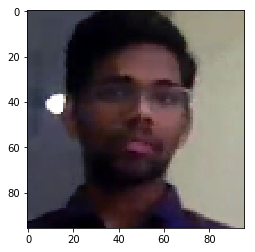

In [5]:
k = 2
plt.imshow(np.rollaxis(x_train[k],0,3))
print(y_train[k])

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(256,activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(num_category,activation = tf.nn.softmax))
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
batch_size = 64
num_epoch = 20
#model training
model_log = model.fit(x_train, y_train,batch_size=batch_size,epochs=num_epoch,validation_split=0.2)
# model.save('saved_model.model')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1292 samples, validate on 323 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1292/1292 [==============================] - 3s 3ms/sample - loss: 0.3356 - acc: 0.8983 - val_loss: 0.2110 - val_acc: 0.9182
Epoch 2/20
1292/1292 [==============================] - 0s 365us/sample - loss: 0.1890 - acc: 0.9335 - val_loss: 0.1250 - val_acc: 0.9577
Epoch 3/20
1292/1292 [==============================] - 0s 345us/sample - loss: 0.1106 - acc: 0.9602 - val_loss: 0.0835 - val_acc: 0.9688
Epoch 4/20
1292/1292 [==============================] - 0s 331us/sample - loss: 0.0793 - acc: 0.9721 - val_loss: 0.0579 - val_acc: 0.9783
Epoch 5/20
1292/1292 [==============================] - 0s 322us/sample - loss: 0.0518 - acc: 0.9815 - val_loss: 0.0261 - val_acc: 0.9917
Epoch 6/20
1292/1292 [==============================] - 0s 331us/sample - loss: 0.0296 - acc: 0.9896 -

In [8]:
score = model.evaluate(x_train, y_train)

1615/1615 [==============================] - 0s 150us/sample - loss: 0.0164 - acc: 0.9940


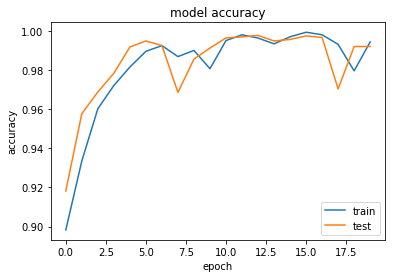

In [9]:
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [ ]:
model.predict()